In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import geopandas as gpd
import geoplot as gplt
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geoplot.crs as gcrs
import contextily as ctx
import shapely.wkt
from geopandas import sjoin
import fiona
import shapely.speedups
shapely.speedups.enable()
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

/Users/gloriaamakude/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/gloriaamakude/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
#Read all datasets for the Sample data using glob

files = glob.glob('part*')

In [3]:
#Use a list comprehension to concat all files

data = pd.concat( pd.read_csv(file) for file in files)
data

,device_id,lat,lon,utc_timestamp
0,42039,52.571806,13.311957,1610711155000
1,47261,52.506415,13.518467,1610737136000
2,32292,52.571226,13.517675,1610753301000
3,103416,52.649507,13.532222,1610733210000
4,109298,52.447100,13.631400,1610695780000
...,...,...,...,...
39995,38425,52.630631,13.299379,1610948426000
39996,73565,52.426446,13.502953,1610984703000
39997,36866,52.735919,13.378849,1610964602000
39998,34774,52.514717,13.583217,1610951627000


In [4]:
#Convert unix time to readable date in milliseconds (epoch)

data['ts'] = (pd.to_datetime(data['utc_timestamp'], unit='ms')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('Europe/Berlin')) 

#Create a date column
data['date'] = data['ts'].dt.date

data.head()

,device_id,lat,lon,utc_timestamp,ts,date
0,42039,52.571806,13.311957,1610711155000,2021-01-15 12:45:55+01:00,2021-01-15
1,47261,52.506415,13.518467,1610737136000,2021-01-15 19:58:56+01:00,2021-01-15
2,32292,52.571226,13.517675,1610753301000,2021-01-16 00:28:21+01:00,2021-01-16
3,103416,52.649507,13.532222,1610733210000,2021-01-15 18:53:30+01:00,2021-01-15
4,109298,52.447100,13.631400,1610695780000,2021-01-15 08:29:40+01:00,2021-01-15


In [5]:
#Convert the DataFrame's Lat and Lon columns into appropriate Shapely geometries and then create a GeoDataFrame.
geometry = [Point(xy) for xy in zip(data.lon, data.lat)]
data = data.drop(['lon', 'lat'], axis=1)
data = GeoDataFrame(data, crs="EPSG:4326", geometry=geometry)
data

,device_id,utc_timestamp,ts,date,geometry
0,42039,1610711155000,2021-01-15 12:45:55+01:00,2021-01-15,POINT (13.31196 52.57181)
1,47261,1610737136000,2021-01-15 19:58:56+01:00,2021-01-15,POINT (13.51847 52.50641)
2,32292,1610753301000,2021-01-16 00:28:21+01:00,2021-01-16,POINT (13.51768 52.57123)
3,103416,1610733210000,2021-01-15 18:53:30+01:00,2021-01-15,POINT (13.53222 52.64951)
4,109298,1610695780000,2021-01-15 08:29:40+01:00,2021-01-15,POINT (13.63140 52.44710)
...,...,...,...,...,...
39995,38425,1610948426000,2021-01-18 06:40:26+01:00,2021-01-18,POINT (13.29938 52.63063)
39996,73565,1610984703000,2021-01-18 16:45:03+01:00,2021-01-18,POINT (13.50295 52.42645)
39997,36866,1610964602000,2021-01-18 11:10:02+01:00,2021-01-18,POINT (13.37885 52.73592)
39998,34774,1610951627000,2021-01-18 07:33:47+01:00,2021-01-18,POINT (13.58322 52.51472)


In [6]:
# read stores datasets

store_data= pd.read_csv('stores.csv')
store_data

,store_id,store_name,wkt
0,place_1,McDonald's,POLYGON ((13.4611920000000005 52.4709870000000...
1,place_2,McDonald's,POLYGON ((13.4683480000000007 52.5471599999999...
2,place_3,McDonald's,POLYGON ((13.3128810000000009 52.4197929999999...
3,place_4,McDonald's,POLYGON ((13.3635780000000004 52.5606039999999...
4,place_5,McDonald's,POLYGON ((13.3230909999999998 52.5613460000000...
...,...,...,...
242,place_243,Renault,POLYGON ((13.3686120000000006 52.4831089999999...
243,place_244,Renault,POLYGON ((13.2863860000000003 52.5164690000000...
244,place_245,Lexus,POLYGON ((13.5198269999999994 52.5265330000000...
245,place_246,Sparkasse,POLYGON ((13.5389199999999992 52.6766369999999...


In [7]:
#The format for the store data polygon is WKT, so we need to convert it to a shapely Polygon
geometry = store_data['wkt'].map(shapely.wkt.loads)

#drop wkt column as it is no longer required
store_data = store_data.drop('wkt', axis=1)

#convert the data to a Geodataframe
store_data = gpd.GeoDataFrame(store_data, crs="EPSG:4326", geometry=geometry)
store_data

,store_id,store_name,geometry
0,place_1,McDonald's,"POLYGON ((13.46119 52.47099, 13.46103 52.47066..."
1,place_2,McDonald's,"POLYGON ((13.46835 52.54716, 13.46841 52.54716..."
2,place_3,McDonald's,"POLYGON ((13.31288 52.41979, 13.31303 52.41966..."
3,place_4,McDonald's,"POLYGON ((13.36358 52.56060, 13.36358 52.56061..."
4,place_5,McDonald's,"POLYGON ((13.32309 52.56135, 13.32307 52.56128..."
...,...,...,...
242,place_243,Renault,"POLYGON ((13.36861 52.48311, 13.36833 52.48317..."
243,place_244,Renault,"POLYGON ((13.28639 52.51647, 13.28640 52.51637..."
244,place_245,Lexus,"POLYGON ((13.51983 52.52653, 13.52021 52.52654..."
245,place_246,Sparkasse,"POLYGON ((13.53892 52.67664, 13.53866 52.67654..."


In [8]:
#To check if the point is within the polygon and join both data

user_data = gpd.sjoin(data, store_data, how="inner", op='within')
user_data

,device_id,utc_timestamp,ts,date,geometry,index_right,store_id,store_name
976,61490,1610690078000,2021-01-15 06:54:38+01:00,2021-01-15,POINT (13.33911 52.58865),159,place_160,Rewe
37206,42048,1610729876000,2021-01-15 17:57:56+01:00,2021-01-15,POINT (13.33898 52.58873),159,place_160,Rewe
39716,56315,1611228437000,2021-01-21 12:27:17+01:00,2021-01-21,POINT (13.33906 52.58870),159,place_160,Rewe
36928,47521,1610714708000,2021-01-15 13:45:08+01:00,2021-01-15,POINT (13.33857 52.58879),159,place_160,Rewe
5966,34348,1610815823000,2021-01-16 17:50:23+01:00,2021-01-16,POINT (13.33900 52.58868),159,place_160,Rewe
...,...,...,...,...,...,...,...,...
35502,24012,1609946411000,2021-01-06 16:20:11+01:00,2021-01-06,POINT (13.49573 52.43088),133,place_134,Aldi
37330,51184,1610723294000,2021-01-15 16:08:14+01:00,2021-01-15,POINT (13.62192 52.44626),71,place_72,Aldi
25131,78629,1610733037000,2021-01-15 18:50:37+01:00,2021-01-15,POINT (13.62190 52.44598),71,place_72,Aldi
7949,16083,1609948975000,2021-01-06 17:02:55+01:00,2021-01-06,POINT (13.28661 52.59192),65,place_66,Aldi



Assignment
Analyze the store visitation by date and affinity profile of store visitors.

1. Resolve the user visits per store, i.e. filter the GPS signals through polygons.
2. Group the resolved visits by date (yyyy-mm-dd), store_name, and store_id.

For each store_id/store_name/date provide the following metric.

3. A total number of GPS signals per place_id/date.
4. A total number of unique visitors (i.e. device ids).
5. A total number of unique visitors belonging to each affinity group.
(An example of the expected format can be found in example.csv, you can download it here as a reference.)

# A. Resolve the user visits per store, i.e. filter the GPS signals through polygons.

In [9]:
#Get Insights about our joined data

user_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2747 entries, 976 to 17439
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype                        
---  ------         --------------  -----                        
 0   device_id      2747 non-null   int64                        
 1   utc_timestamp  2747 non-null   int64                        
 2   ts             2747 non-null   datetime64[ns, Europe/Berlin]
 3   date           2747 non-null   object                       
 4   geometry       2747 non-null   geometry                     
 5   index_right    2747 non-null   int64                        
 6   store_id       2747 non-null   object                       
 7   store_name     2747 non-null   object                       
dtypes: datetime64[ns, Europe/Berlin](1), geometry(1), int64(3), object(3)
memory usage: 193.1+ KB


In [10]:
#Lets group the data accordingly by store and place to have an overview of all the stores's performances

user_data.groupby(['store_name', 'store_id']).device_id.count().sort_values(ascending=False)

store_name  store_id 
Kaufland    place_214    159
            place_215     97
            place_224     84
            place_227     84
Rewe        place_210     76
                        ... 
Aldi        place_73       1
            place_95       1
            place_65       1
            place_118      1
Subway      place_53       1
Name: device_id, Length: 186, dtype: int64

# B. Group the resolved visits by date (yyyy-mm-dd), store_name, and store_id.

In [11]:
#Group the resoled visits by date (yyyy-mm-dd), store_name, and store_id and count the number of unique visits

grouped_rv = user_data.groupby(['date', 'store_name','store_id']).device_id.count()

grouped_rv

date        store_name   store_id 
2021-01-01  Aldi         place_64     1
            Burger King  place_42     4
                         place_43     1
                         place_50     1
            McDonald's   place_17     1
                                     ..
2021-01-21  Rewe         place_199    1
                         place_200    1
                         place_203    2
                         place_209    3
                         place_210    4
Name: device_id, Length: 1202, dtype: int64

# C. For each store_id/store_name/date provide the following metric.

## Ci. A total number of GPS signals per place_id/date.

In [12]:
#To find the total GPS signals per place_id/date, we need to group the data by date and store_id and count all signals

total_signals = user_data.groupby(['date','store_id']).geometry.count().sort_values(ascending=False)
total_signals

date        store_id 
2021-01-16  place_214    23
2021-01-09  place_214    20
2021-01-16  place_216    15
            place_215    15
2021-01-18  place_214    13
                         ..
2021-01-09  place_192     1
2021-01-16  place_178     1
2021-01-09  place_187     1
            place_182     1
2021-01-01  place_141     1
Name: geometry, Length: 1202, dtype: int64

# Cii. A total number of unique visitors (i.e. device ids).

In [13]:
#Total count of a device ids

user_data['device_id'].count()

2747

In [14]:
#to check days with the highest unique visits 

visit_per_day = user_data.groupby(['date']).device_id.count().sort_values(ascending=False)

visit_per_day

date
2021-01-16    218
2021-01-15    201
2021-01-09    195
2021-01-08    173
2021-01-21    170
2021-01-04    167
2021-01-14    158
2021-01-02    157
2021-01-18    145
2021-01-19    143
2021-01-05    140
2021-01-06    138
2021-01-11    138
2021-01-07    135
2021-01-12    129
2021-01-20    128
2021-01-13    117
2021-01-17     29
2021-01-10     26
2021-01-01     26
2021-01-03     14
Name: device_id, dtype: int64

In [15]:
#Total unique visitors per date, store name, and store id

total_uniq_vis = user_data.groupby(['date', 'store_name','store_id']).device_id.count().sort_values(ascending=False)
total_uniq_vis

date        store_name  store_id 
2021-01-16  Kaufland    place_214    23
2021-01-09  Kaufland    place_214    20
2021-01-16  Kaufland    place_215    15
                        place_216    15
2021-01-08  Kaufland    place_227    13
                                     ..
2021-01-09  Kaufland    place_225     1
                        place_224     1
2021-01-16  McDonald's  place_18      1
                        place_2       1
2021-01-01  Aldi        place_64      1
Name: device_id, Length: 1202, dtype: int64

In [16]:
#Total count of visitors for each store

visits_per_store =user_data.groupby(['store_name']).device_id.count().sort_values(ascending=False)
visits_per_store

store_name
Rewe           1027
Kaufland        933
Aldi            475
McDonald's      190
Burger King      49
Lexus            28
Renault          24
Mercedes         19
Subway            2
Name: device_id, dtype: int64

# Ciii. A total number of unique visitors belonging to each affinity group.

In [17]:
#Read the Apple affinity dataset and find the counts of each device id 

apple_affi = pd.read_csv('apple_affi.csv')

apple_affi= apple_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
apple_affi = apple_affi.to_frame().rename(columns={0: 'apple'}).reset_index()
apple_affi

,device_id,apple
0,174414,1
1,58639,1
2,58579,1
3,58568,1
4,58553,1
...,...,...
11653,116509,1
11654,116501,1
11655,116498,1
11656,116488,1


In [18]:
#Read the addidas affinity dataset and find the counts of each device id 

addidas_affi = pd.read_csv('addidas_affi.csv')

addidas_affi= addidas_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
addidas_affi = addidas_affi.to_frame().rename(columns={0: 'addidas'}).reset_index()
addidas_affi

,device_id,addidas
0,174383,1
1,57047,1
2,56559,1
3,56602,1
4,56625,1
...,...,...
6771,114605,1
6772,114624,1
6773,114642,1
6774,114664,1


In [19]:
#Read the employed affinity dataset and find the counts of each device id 

employed_affi = pd.read_csv('employed_affi.csv')

employed_affi= employed_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
employed_affi = employed_affi.to_frame().rename(columns={0: 'employed'}).reset_index()
employed_affi

,device_id,employed
0,174387,1
1,58013,1
2,57762,1
3,57805,1
4,57815,1
...,...,...
8571,117001,1
8572,117029,1
8573,117036,1
8574,117038,1


In [20]:
#Read the bmw_affi affinity dataset and find the counts of each device id 

bmw_affi = pd.read_csv('bmw_affi.csv')

bmw_affi= bmw_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
bmw_affi = bmw_affi.to_frame().rename(columns={0: 'bmw'}).reset_index()
bmw_affi

,device_id,bmw
0,174377,1
1,58131,1
2,58066,1
3,58064,1
4,58037,1
...,...,...
9720,115846,1
9721,115829,1
9722,115763,1
9723,115736,1


In [21]:
#Read the female affinity dataset and find the counts of each device id 

female_affi = pd.read_csv('female_affi.csv')

female_affi= female_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
female_affi = female_affi.to_frame().rename(columns={0: 'female'}).reset_index()
female_affi

,device_id,female
0,174414,1
1,114806,1
2,114798,1
3,114799,1
4,114800,1
...,...,...
89410,144611,1
89411,144612,1
89412,144613,1
89413,144614,1


In [22]:
#Read the h_&_m affinity dataset and find the counts of each device id 

h_m_affi = pd.read_csv('h_&_m_affi.csv')

h_m_affi= h_m_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
h_m_affi = h_m_affi.to_frame().rename(columns={0: 'h_m'}).reset_index()
h_m_affi

,device_id,h_m
0,174408,1
1,57141,1
2,57783,1
3,57820,1
4,57841,1
...,...,...
7213,115131,1
7214,115137,1
7215,115169,1
7216,115182,1


In [23]:
#Read the high_income affinity dataset and find the counts of each device id 

high_income_affi = pd.read_csv('high_income_affi.csv')

high_income_affi = high_income_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
high_income_affi = high_income_affi.to_frame().rename(columns={0: 'high_income'}).reset_index()
high_income_affi

,device_id,high_income
0,99999,1
1,33349,1
2,33314,1
3,33319,1
4,33324,1
...,...,...
19995,66669,1
19996,66674,1
19997,66679,1
19998,66684,1


In [24]:
#Read the honda affinity dataset and find the counts of each device id 

honda_affi = pd.read_csv('honda_affi.csv')

honda_affi = honda_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
honda_affi = honda_affi.to_frame().rename(columns={0: 'honda'}).reset_index()
honda_affi

,device_id,honda
0,174413,1
1,58731,1
2,58366,1
3,58353,1
4,58334,1
...,...,...
14413,117048,1
14414,117006,1
14415,117001,1
14416,116981,1


In [25]:
#Read the job_seeking affinity dataset and find the counts of each device id 

job_seeking_affi = pd.read_csv('job_seeking_affi.csv')

job_seeking_affi = job_seeking_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
job_seeking_affi = job_seeking_affi.to_frame().rename(columns={0: 'job_seeking'}).reset_index()
job_seeking_affi

,device_id,job_seeking
0,174414,1
1,57789,1
2,57878,1
3,57827,1
4,57824,1
...,...,...
9898,116561,1
9899,116560,1
9900,116539,1
9901,116471,1


In [26]:
#Read the low income affinity dataset and find the counts of each device id 

low_income_affi = pd.read_csv('low_income_affi.csv')

low_income_affi = low_income_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
low_income_affi = low_income_affi.to_frame().rename(columns={0: 'low_income'}).reset_index()
low_income_affi

,device_id,low_income
0,174410,1
1,58120,1
2,58150,1
3,58145,1
4,58140,1
...,...,...
34878,116305,1
34879,116310,1
34880,116315,1
34881,116320,1


In [27]:
#Read the male affinity dataset and find the counts of each device id 

male_affi = pd.read_csv('male_affi.csv')

male_affi = male_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
male_affi = male_affi.to_frame().rename(columns={0: 'male'}).reset_index()
male_affi

,device_id,male
0,84999,1
1,28326,1
2,28328,1
3,28329,1
4,28330,1
...,...,...
84995,56667,1
84996,56668,1
84997,56669,1
84998,56670,1


In [28]:
#Read the mercedes_benz affinity dataset and find the counts of each device id 

mercedes_benz_affi = pd.read_csv('mercedes_benz_affi.csv')

mercedes_benz_affi = mercedes_benz_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
mercedes_benz_affi = mercedes_benz_affi.to_frame().rename(columns={0: 'mercedes_benz'}).reset_index()
mercedes_benz_affi

,device_id,mercedes_benz
0,174409,1
1,58194,1
2,58450,1
3,58432,1
4,58418,1
...,...,...
10369,116078,1
10370,116069,1
10371,116025,1
10372,116010,1


In [29]:
#Read the middle_income affinity dataset and find the counts of each device id 

middle_income_affi= pd.read_csv('middle_income_affi.csv')

middle_income_affi = middle_income_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
middle_income_affi = middle_income_affi.to_frame().rename(columns={0: 'middle_income'}).reset_index()
middle_income_affi

,device_id,middle_income
0,174413,1
1,58143,1
2,58127,1
3,58128,1
4,58131,1
...,...,...
104644,116278,1
104645,116281,1
104646,116282,1
104647,116283,1


In [30]:
#Read the retired affinity dataset and find the counts of each device id 

retired_affi= pd.read_csv('retired_affi.csv')

retired_affi = retired_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
retired_affi = retired_affi.to_frame().rename(columns={0: 'retired'}).reset_index()
retired_affi

,device_id,retired
0,174388,1
1,57806,1
2,57871,1
3,57873,1
4,57883,1
...,...,...
5778,116756,1
5779,116762,1
5780,116773,1
5781,116800,1


In [31]:
#Read the student dataset and find the counts of each device id 

student_affi= pd.read_csv('student_affi.csv')

student_affi = student_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
student_affi = student_affi.to_frame().rename(columns={0: 'student'}).reset_index()
student_affi

,device_id,student
0,174414,1
1,57955,1
2,58071,1
3,58064,1
4,58063,1
...,...,...
12856,116852,1
12857,116834,1
12858,116829,1
12859,116824,1


In [32]:
#Read the tommy hilfiger dataset and find the counts of each device id 

tommy_hilfiger_affi= pd.read_csv('tommy_hilfiger_affi.csv')

tommy_hilfiger_affi = tommy_hilfiger_affi[['device_id']].value_counts()


#convert the series to a dataframe and rename the coulmn
tommy_hilfiger_affi = tommy_hilfiger_affi.to_frame().rename(columns={0: 'tommy_hilfiger'}).reset_index()
tommy_hilfiger_affi

,device_id,tommy_hilfiger
0,174413,1
1,58044,1
2,57872,1
3,57879,1
4,57881,1
...,...,...
6066,115431,1
6067,115438,1
6068,115476,1
6069,115483,1


In [33]:
#Create a list of all the datasets to be merged

all_affin_data = [user_data, apple_affi, addidas_affi, employed_affi, bmw_affi, 
                            female_affi, h_m_affi, high_income_affi, honda_affi,
                            job_seeking_affi, low_income_affi, male_affi, mercedes_benz_affi,
                            middle_income_affi, retired_affi, student_affi,tommy_hilfiger_affi]

In [34]:
#Now lets merge all datasets

from functools import reduce

All_df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['device_id'], how='left'
                                           ),all_affin_data).fillna(0)

All_df_merged

,device_id,utc_timestamp,ts,date,geometry,index_right,store_id,store_name,apple,addidas,...,high_income,honda,job_seeking,low_income,male,mercedes_benz,middle_income,retired,student,tommy_hilfiger
0,61490,1610690078000,2021-01-15 06:54:38+01:00,2021-01-15,POINT (13.33911 52.58865),159,place_160,Rewe,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,42048,1610729876000,2021-01-15 17:57:56+01:00,2021-01-15,POINT (13.33898 52.58873),159,place_160,Rewe,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,56315,1611228437000,2021-01-21 12:27:17+01:00,2021-01-21,POINT (13.33906 52.58870),159,place_160,Rewe,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,47521,1610714708000,2021-01-15 13:45:08+01:00,2021-01-15,POINT (13.33857 52.58879),159,place_160,Rewe,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,34348,1610815823000,2021-01-16 17:50:23+01:00,2021-01-16,POINT (13.33900 52.58868),159,place_160,Rewe,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,24012,1609946411000,2021-01-06 16:20:11+01:00,2021-01-06,POINT (13.49573 52.43088),133,place_134,Aldi,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2743,51184,1610723294000,2021-01-15 16:08:14+01:00,2021-01-15,POINT (13.62192 52.44626),71,place_72,Aldi,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2744,78629,1610733037000,2021-01-15 18:50:37+01:00,2021-01-15,POINT (13.62190 52.44598),71,place_72,Aldi,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2745,16083,1609948975000,2021-01-06 17:02:55+01:00,2021-01-06,POINT (13.28661 52.59192),65,place_66,Aldi,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [35]:
#To get a total unique visitors belonging to each affinity group, we find the sum of a all affinities per device id 

total_affi_group = All_df_merged.drop(['utc_timestamp', 'index_right', 
                'store_id', 'store_name', 'device_id'], axis=1).sum().astype(int)


#convert the series to a pandas dataframe and rename the column
total_affi_group = total_affi_group.to_frame().rename(columns={0: 'Total_affin_group'}).reset_index()
total_affi_group

,index,Total_affin_group
0,apple,168
1,addidas,133
2,employed,140
3,bmw,226
4,female,154
5,h_m,97
6,high_income,448
7,honda,305
8,job_seeking,135
9,low_income,603


# 2a. Using a tool of your choice, visualize the trend of unique visits for all places.

<Figure size 216x504 with 0 Axes>

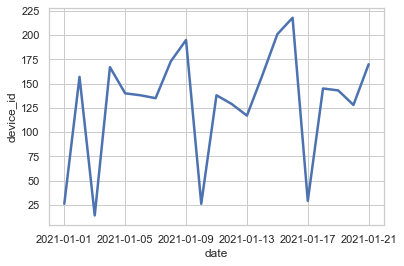

<Figure size 216x504 with 0 Axes>

In [36]:
import seaborn as sns
sns.set_theme(style="whitegrid")


sns.lineplot(data=visit_per_day, palette="tab10", linewidth=2.5)
plt.figure(figsize=(3,7))

# 2b. Summary of Analysis:

From our anlysis of the unique visit trend, we can see that the stores had more visitors within the middle of the month of january (2021-01-16 and 2021-01-15) with a total of 218 and 201 Respectively. While the lowest number of visitors was recorded on the 3rd and 1st of January (14 and 26 visitors).

Also place_214 (Kaufland) was the store with the most visits and a total of 159 visitors within the month. It also recorded the highest number of single day visitors(23) on the 2021-01-16.


In total, the average number of unique visitor per day for all stores was about 130 visitors with a high record of visitors (218)  on the 16th of january 2021.

Rewe and Kaufland were the most visted stores and had a total of 1027 and 933 visits respectively during this period.

while it was discovered that over 90% of visitors were male, further analysis would be needed to analyze users demographics against store visits based on their gender and income.
